# Exploratory Data Analysis & Intro

# Goal

1. INvestigate top-paying roles and skills in the data science industry.

2. Use Python to explore real-live datasets on job postings.

3. For job-seeekers: use these insights to help find the best job opportunities.

# Final Deliverables:

* Create a Jupyter Notebook (showcasing core skills in Python)

* Create a summary page (via Readme.md) capturing your findigs.

* Share this project via GitHub & LinkedIn

# Roles to explore

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#! pip install adjustText
from adjustText import adjust_text


# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


In [9]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

In [10]:
# Import seaborn lib as sns

import seaborn as sns

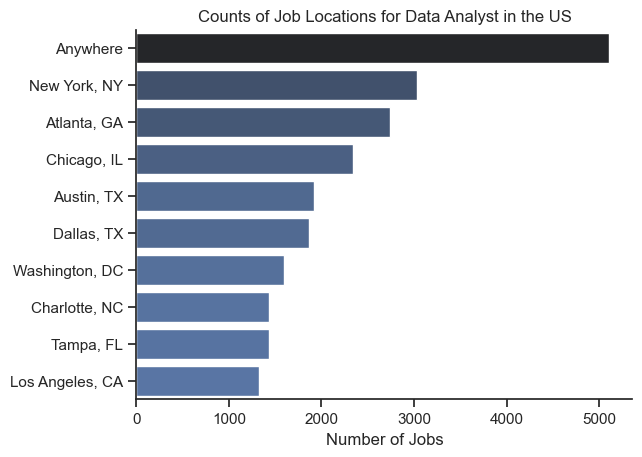

In [20]:
sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

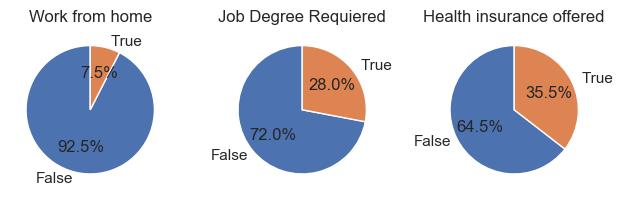

In [22]:
fig, ax = plt.subplots(1, 3)

dict_colum = {
    'job_work_from_home' : 'Work from home',
    'job_no_degree_mention' : 'Job Degree Requiered',
    'job_health_insurance' : 'Health insurance offered'
}

for i, (column, title) in enumerate(dict_colum.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', ' True'])
    ax[i].set_title(title)


fig.tight_layout()
plt.show()


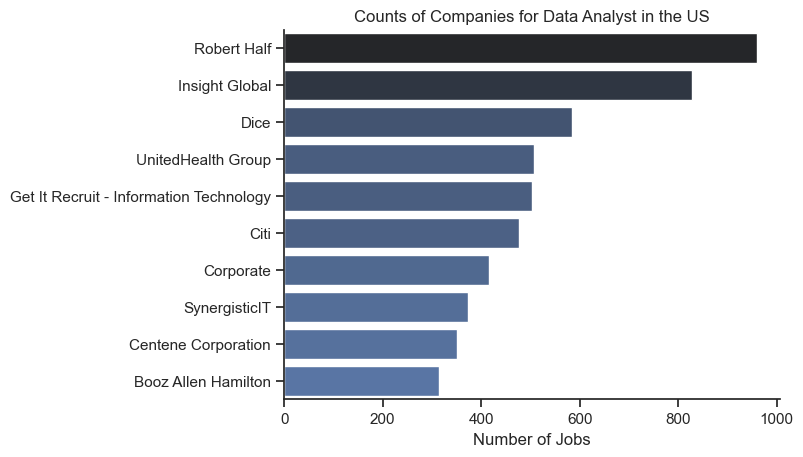

In [23]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
